<a href="https://colab.research.google.com/github/svobodn1y/Alive_or_Not/blob/master/Matrix_Multiplication_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм Штрассена



Наивный алгоритм $O(n^{3})$

Алгоритм Штрассена $O(n^{2.81})$

Алгоритм Винограда — Штрассена $O(n^{2.81})$

Алгоритм Копперсмита - Винограда $O(n^{2.3727})$



## Пример реализации алгоритма Штрассена


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
def split_to_2x2_blocks(matrix):
	return list(map(
		lambda row: np.hsplit(row, 2),
		np.vsplit(matrix, 2)
	))

def strassen_mul_2x2(lb, rb):
	d = strassen_mul(lb[0][0] + lb[1][1], rb[0][0] + rb[1][1])
	d_1 = strassen_mul(lb[0][1] - lb[1][1], rb[1][0] + rb[1][1])
	d_2 = strassen_mul(lb[1][0] - lb[0][0], rb[0][0] + rb[0][1])

	left = strassen_mul(lb[1][1], rb[1][0] - rb[0][0])
	right = strassen_mul(lb[0][0], rb[0][1] - rb[1][1])
	top = strassen_mul(lb[0][0] + lb[0][1], rb[1][1])
	bottom = strassen_mul(lb[1][0] + lb[1][1], rb[0][0])

	return [[d + d_1 + left - top, right + top],
			[left + bottom, d + d_2 + right - bottom]]

def trivial_mul(left, right):
	height, mid_size = left.shape
	mid_size, width = right.shape

	result = np.zeros((height, width))
	for row, col, mid in product(*map(range, [height, width, mid_size])):
		result[row][col] += left[row][mid] * right[mid][col]

	return result

TRIVIAL_MULTIPLICATION_BOUND = 8

def strassen_mul(left, right):
  assert(left.shape == right.shape)
  assert(left.shape[0] == left.shape[1])


  if left.shape[0] <= TRIVIAL_MULTIPLICATION_BOUND:
    return trivial_mul(left, right)

  assert(left.shape[0] % 2 == 0)
  return np.block(
		strassen_mul_2x2(*map(split_to_2x2_blocks, [left, right]))
	)


In [ ]:
m, k, n = 2**9, 2**9, 2**9

In [ ]:
left = np.random.uniform(0, 100, size=(m, k))
right = np.random.uniform(0, 100, size=(k, n))

In [ ]:
%%time
strassen_mul(left, right)

CPU times: user 1min 15s, sys: 263 ms, total: 1min 15s
Wall time: 1min 15s


array([[1241752.96764907, 1292388.57187279, 1264498.42293212, ...,
        1307465.96126718, 1277412.22271528, 1343467.59865532],
       [1183245.44302944, 1274558.639147  , 1263329.50046267, ...,
        1244077.44231603, 1275350.52414066, 1315330.97018361],
       [1258261.82054561, 1344196.47668417, 1354867.02909631, ...,
        1341372.56914014, 1356061.90175482, 1384135.07585229],
       ...,
       [1186034.92587976, 1250894.83889825, 1279412.64702617, ...,
        1228799.78696424, 1264606.61820145, 1299602.20347427],
       [1237334.69025362, 1309773.78867263, 1293709.57837091, ...,
        1326909.02206983, 1288202.6960079 , 1327160.14911856],
       [1211731.90101444, 1301818.94694294, 1283192.05721465, ...,
        1277625.20828278, 1298440.662086  , 1360984.57709862]])

In [ ]:
%%time
# Инициализируем пустую матрицу C размером m x n, заполненную нулями
C = [[0 for _ in range(n)] for _ in range(m)]

# Умножаем матрицы по правилу тройного цикла
for i in range(m):  # строки матрицы A
    for j in range(n):  # столбцы матрицы B
        for p in range(k):  # индекс для произведения элементов A и B
            C[i][j] += left[i][p] * right[p][j]

CPU times: user 2min 18s, sys: 373 ms, total: 2min 19s
Wall time: 2min 20s


In [ ]:
# Функция для классического умножения матриц
def classic_matrix_multiplication(A, B):
  return A @ B

# Функция для дополнения матрицы до квадратной формы
def pad_matrix(A):
    m, n = A.shape
    new_size = max(m, n)
    padded_A = np.zeros((new_size, new_size), dtype=A.dtype)
    padded_A[:m, :n] = A
    return padded_A

# Функция для деления матрицы на 4 части
def split_matrix(A):
    row, col = A.shape
    return A[:row//2, :col//2], A[:row//2, col//2:], A[row//2:, :col//2], A[row//2:, col//2:]

# Рекурсивная реализация алгоритма Штрассена
def strassen(A, B):
    if A.shape[0] <= 2:
        return np.dot(A, B)

    A_padded = pad_matrix(A)
    B_padded = pad_matrix(B)

    A11, A12, A21, A22 = split_matrix(A_padded)
    B11, B12, B21, B22 = split_matrix(B_padded)

    M1 = strassen(A11 + A22, B11 + B22)
    M2 = strassen(A21 + A22, B11)
    M3 = strassen(A11, B12 - B22)
    M4 = strassen(A22, B21 - B11)
    M5 = strassen(A11 + A12, B22)
    M6 = strassen(A21 - A11, B11 + B12)
    M7 = strassen(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 + M3 - M2 + M6

    C = np.zeros_like(A_padded)
    row, col = C11.shape
    C[:row, :col] = C11
    C[:row, col:] = C12
    C[row:, :col] = C21
    C[row:, col:] = C22

    return C[:A.shape[0], :B.shape[1]]

# Функция для замера времени выполнения
def measure_time(func, A, B):
    start_time = time.time()
    result = func(A, B)
    return time.time() - start_time



In [ ]:
def real_classic_matrix_multiplication(A, B):
  size = A.shape[0]
  C = np.zeros((size, size))
    # Инициализируем пустую матрицу C размером m x n, заполненную нулями

  C = [[0 for _ in range(size)] for _ in range(size)]

  # Умножаем матрицы по правилу тройного цикла
  for i in range(size):  # строки матрицы A
      for j in range(size):  # столбцы матрицы B
          for p in range(size):  # индекс для произведения элементов A и B
              C[i][j] += A[i][p] * B[p][j]

In [ ]:
# Сбор данных для графика
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
strassen_times = []
classic_times = []
real_classic_times = []

for size in sizes:
  # Создаем случайные матрицы размером (size, size)
  A = np.random.rand(size, size)
  B = np.random.rand(size, size)

  # Измеряем время для классического умножения
  classic_time = measure_time(classic_matrix_multiplication, A, B)
  classic_times.append(classic_time)

  # Измеряем время для штрассена
  strassen_time = measure_time(strassen_mul, A, B)
  strassen_times.append(strassen_time)

   # Измеряем время для классического умножения
  real_classic_time = measure_time(real_classic_matrix_multiplication, A, B)
  real_classic_times.append(real_classic_time)

  print(size)


2
4
8
16
32
64
128
256
512
1024


In [ ]:
print(strassen_times)
print(classic_times)
print(real_classic_times)

[4.649162292480469e-05, 0.00014209747314453125, 0.0009324550628662109, 0.0071408748626708984, 0.06009364128112793, 0.24776816368103027, 1.473853349685669, 10.96130919456482, 76.38267731666565, 525.0550403594971]
[4.38690185546875e-05, 4.100799560546875e-05, 3.0517578125e-05, 3.361701965332031e-05, 5.173683166503906e-05, 0.0001068115234375, 0.00026726722717285156, 0.001447916030883789, 0.009621143341064453, 0.06902575492858887]
[2.5272369384765625e-05, 8.559226989746094e-05, 0.0006282329559326172, 0.006041288375854492, 0.04519343376159668, 0.20135021209716797, 1.564453125, 13.998307943344116, 112.79524087905884, 927.778436422348]


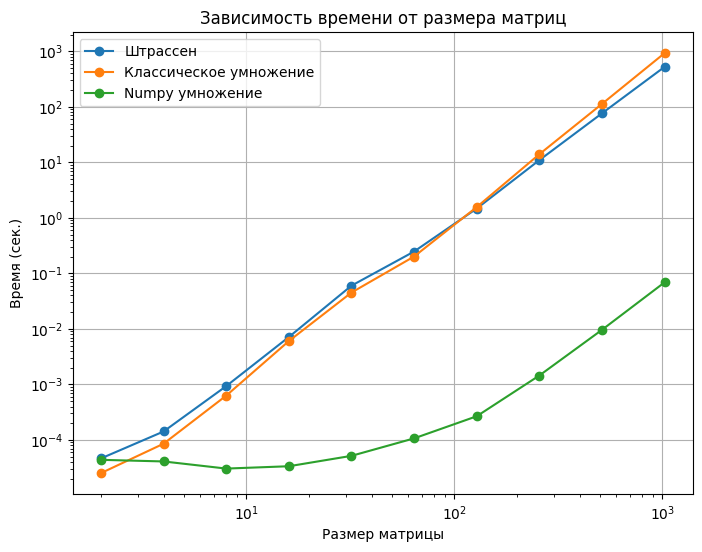

In [ ]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(sizes, strassen_times, label="Штрассен", marker='o')
plt.plot(sizes, real_classic_times, label="Классическое умножение", marker='o')
plt.plot(sizes, classic_times, label="Numpy умножение", marker='o')
plt.xlabel("Размер матрицы")
plt.ylabel("Время (сек.)")
plt.title("Зависимость времени от размера матриц")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

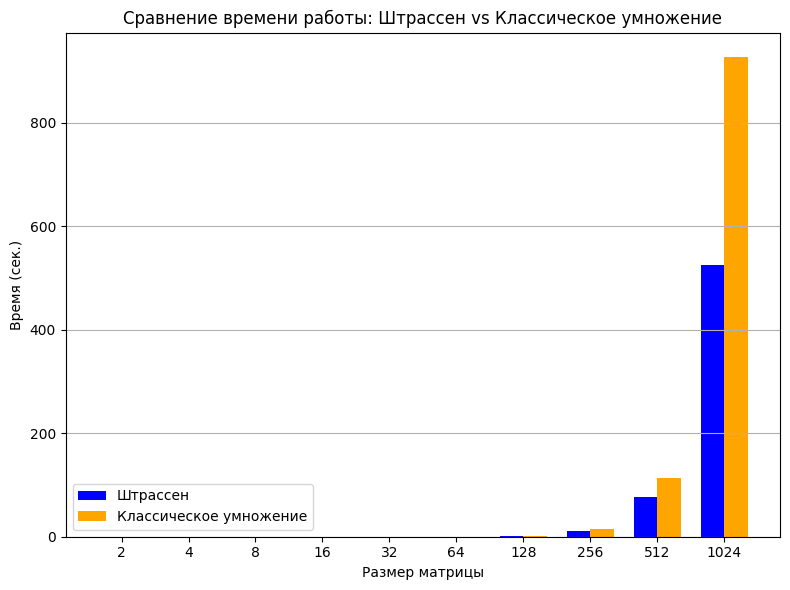

In [ ]:
# Построение гистограммы
bar_width = 0.35  # Ширина столбцов
index = np.arange(len(sizes))  # Позиции для столбцов

# Создание гистограммы
plt.figure(figsize=(8, 6))
plt.bar(index, strassen_times, bar_width, label="Штрассен", color='blue')
plt.bar(index + bar_width, real_classic_times, bar_width, label="Классическое умножение", color='orange')

# Настройки графика
plt.xlabel("Размер матрицы")
plt.ylabel("Время (сек.)")
plt.title("Сравнение времени работы: Штрассен vs Классическое умножение")
plt.xticks(index + bar_width / 2, sizes)  # Подписи по оси X
plt.legend(loc = 'lower left')
plt.grid(True, axis='y')

# Показать график
plt.tight_layout()
plt.show()

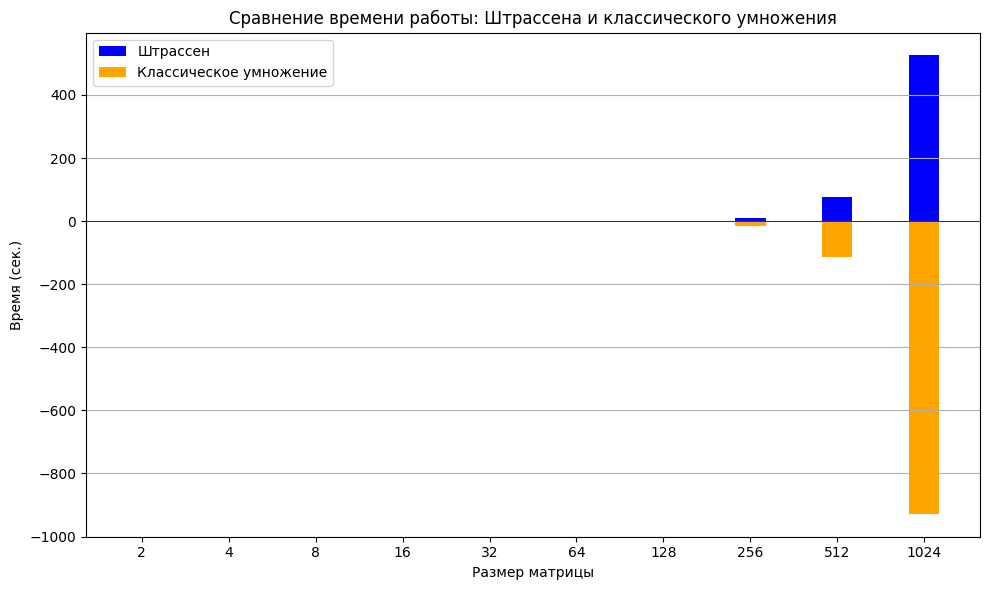

In [ ]:
# Ширина столбцов
bar_width = 0.35

# Позиции для столбцов
index = np.arange(len(sizes))  # Позиции по оси X

# Создание графика
plt.figure(figsize=(10, 6))

# Столбцы для Штрассена — над осью X
plt.bar(index, strassen_times, bar_width, label="Штрассен", color='blue')

# Столбцы для классического умножения — под осью X (сдвигаем вниз)
plt.bar(index, [-time for time in real_classic_times], bar_width, label="Классическое умножение", color='orange')

# Настройки графика
plt.xlabel("Размер матрицы")
plt.ylabel("Время (сек.)")
plt.title("Сравнение времени работы: Штрассена и классического умножения")
plt.xticks(index, sizes)  # Подписи по оси X (размеры матриц)
plt.legend()
plt.grid(True, axis='y')

# Добавляем линии для визуализации
plt.axhline(0, color='black',linewidth=0.5)

# Показать график
plt.tight_layout()
plt.show()

## Ссылки

https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D1%82%D1%80%D0%B0%D1%81%D1%81%D0%B5%D0%BD%D0%B0

https://www.youtube.com/watch?v=Wfuk6JszDuA

# Approximating matrix multiplication and low-rank approximation


In [ ]:
import numpy as np
import random
import math

np.random.seed(0)
random.seed(0)

In [ ]:
m = 120
n = 69
p = 40

A = np.random.rand(m,n) * 10

B = np.random.rand(n,p) * 10


In [ ]:
print(A)
print(B)

In [ ]:
c = 69

C = np.zeros((m,c))
R = np.zeros((c,p))

for t in range(c):
  i_t = random.randint(1,n) - 1

  random_array = np.random.rand(n)
  p_i = random_array / np.sum(random_array)

  C[:, t] = A[:, i_t] / math.sqrt(c * random.choice(p_i))
  R[t] = B[i_t] / math.sqrt(c * random.choice(p_i))


In [ ]:
print(C)
print(R)

In [ ]:
AB = np.dot(A,B)

In [ ]:
CR = np.dot(C,R)

In [ ]:
E = (np.linalg.norm(AB - CR))**2
E

5675473291.210613

##Ссылки

https://cs.stanford.edu/people/mmahoney/cs369m/Lectures/lecture3.pdf

#PCA


In [ ]:
import numpy as np

def pca(X, num_components):
    # Шаг 1: Центрируем данные
    X_centered = X - np.mean(X, axis=0)

    # Шаг 2: Вычисляем ковариационную матрицу
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Шаг 3: Находим собственные векторы и собственные значения ковариационной матрицы
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Шаг 4: Сортируем собственные значения и векторы по убыванию собственных значений
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Шаг 5: Выбираем первые num_components собственных векторов
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Шаг 6: Преобразуем данные
    X_reduced = np.dot(X_centered, selected_eigenvectors)

    return X_reduced, sorted_eigenvalues[:num_components]

# Пример использования
# Создадим случайный набор данных
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 образцов, 5 признаков
print(X)
# Применим PCA для сокращения размерности до 2 компонент
X_reduced, eigenvalues = pca(X, 2)

print("Преобразованные данные:\n", X_reduced)
print("Собственные значения:\n", eigenvalues)


[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.26538949 0

#SVD


##MAIN

In [ ]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

###A_approximation

In [ ]:
m, k, n = 10000, 1000, 10000

r = 995

A = np.random.uniform(0, 100, size=(m, r))
B = np.random.uniform(0, 100, size=(r, k))

A = A @ B

In [ ]:
U_full, Sigma_full, Vt_full = svd(A, full_matrices=False)

In [ ]:
Sigma_full[:20]

array([7.90148269e+09, 5.46131662e+06, 5.42615290e+06, 5.41917139e+06,
       5.36967471e+06, 5.35750101e+06, 5.33624216e+06, 5.30549707e+06,
       5.29482681e+06, 5.27216594e+06, 5.25749182e+06, 5.24201072e+06,
       5.22498725e+06, 5.20773740e+06, 5.19934592e+06, 5.15577156e+06,
       5.14649223e+06, 5.12497385e+06, 5.11498951e+06, 5.10014811e+06])

In [ ]:
Sigma_full.shape

(1000,)

In [ ]:
Sigma_full[980:]

array([73735.01918099, 71191.04475574, 65488.38731252, 62546.21641652,
       57095.8249043 , 54246.22263337, 49745.63072342, 44986.30449528,
       43463.63978131, 38792.75095364, 36321.35763959, 34953.2168004 ,
       31378.8249832 , 26821.80559866, 25399.20426779, 19829.15073991,
       15825.3550625 ,  8271.65849645,  3199.57146821,  1216.19832909])

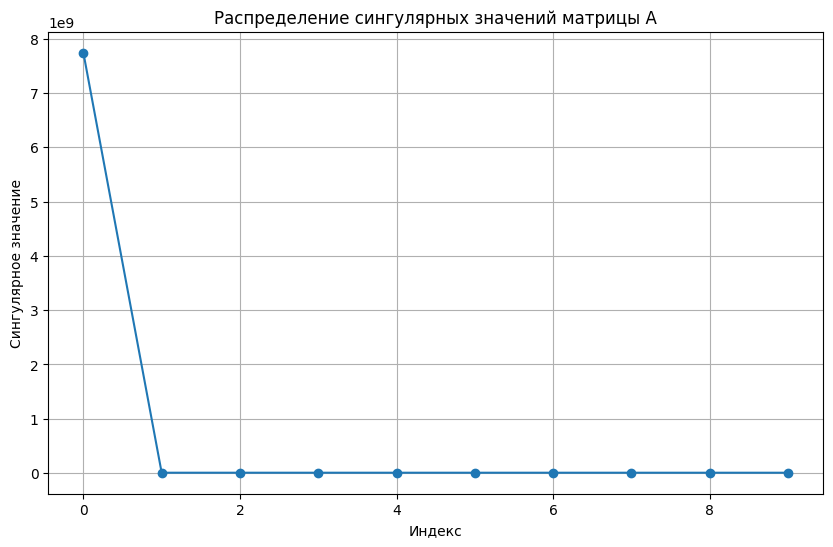

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Sigma_full[:10], marker='o')
plt.title("Распределение сингулярных значений матрицы A")
plt.xlabel("Индекс")
plt.ylabel("Сингулярное значение")
plt.grid(True)
plt.show()

In [ ]:
print(f"Отношение первого сингулярного значения к сумме всех: {Sigma_full[0] / Sigma_full.sum():.4f}")

Отношение первого сингулярного значения к сумме всех: 0.7804


In [ ]:
err = []
for i in range(1000,960,-1):
  r = i
  U_r = U_full[:, :r]
  Sigma_r = np.diag(Sigma_full[:r])
  V_r = Vt_full[:r, :]
  approx_result_for_A = U_r @ (Sigma_r @ V_r)
  absolute_error_for_A = np.linalg.norm(A - approx_result_for_A)
  err.append(absolute_error_for_A)
  print(f"Абсолютная ошибка нахождения А при взятии первых {r} сингулярных значений: {absolute_error_for_A:.4f}")


Абсолютная ошибка нахождения А при взятии первых 1000 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 999 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 998 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 997 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 996 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 995 сингулярных значений: 0.0000
Абсолютная ошибка нахождения А при взятии первых 994 сингулярных значений: 8823.0287
Абсолютная ошибка нахождения А при взятии первых 993 сингулярных значений: 19051.1686
Абсолютная ошибка нахождения А при взятии первых 992 сингулярных значений: 26254.9395
Абсолютная ошибка нахождения А при взятии первых 991 сингулярных значений: 33543.7315
Абсолютная ошибка нахождения А при взятии первых 990 сингулярных значений: 44049.9540
Абсолютная ошибка нахождения А при взятии первых 989 сингулярных значений: 541

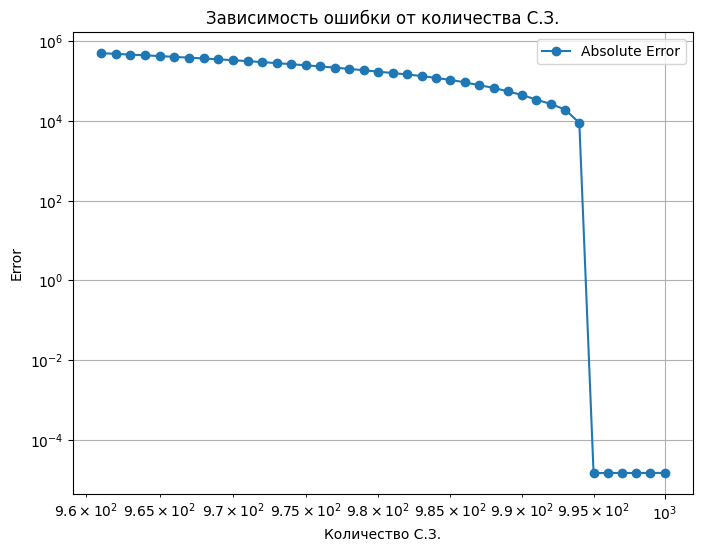

In [ ]:
# Построение графика
errplt = np.array(err)
plt.figure(figsize=(8, 6))
plt.plot(range(1000,960,-1), errplt, label="Absolute Error", marker='o')
plt.xlabel("Количество С.З.")
plt.ylabel("Error")
plt.title("Зависимость ошибки от количества С.З.")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
r = 700

In [ ]:
U_r = U_full[:, :r]
Sigma_r = np.diag(Sigma_full[:r])
V_r = Vt_full[:r, :]

In [ ]:
approx_result_for_A = U_r @ (Sigma_r @ V_r)

In [ ]:
absolute_error_for_A = np.linalg.norm(A - approx_result_for_A)
print(f"Абсолютная ошибка нахождения А при взятии первых {r} сингулярных значений: {absolute_error_for_A:.4f}")

# Сравнение точности
error_for_A = np.linalg.norm(A - approx_result_for_A) / np.linalg.norm(A)
print(f"Средняя ошибка приближенного нахождения А при взятии первых {r} сингулярных значений: {error_for_A}")

Абсолютная ошибка нахождения А при взятии первых 700 сингулярных значений: 11817982.5144
Средняя ошибка приближенного нахождения А при взятии первых 700 сингулярных значений: 0.0015019341062610435


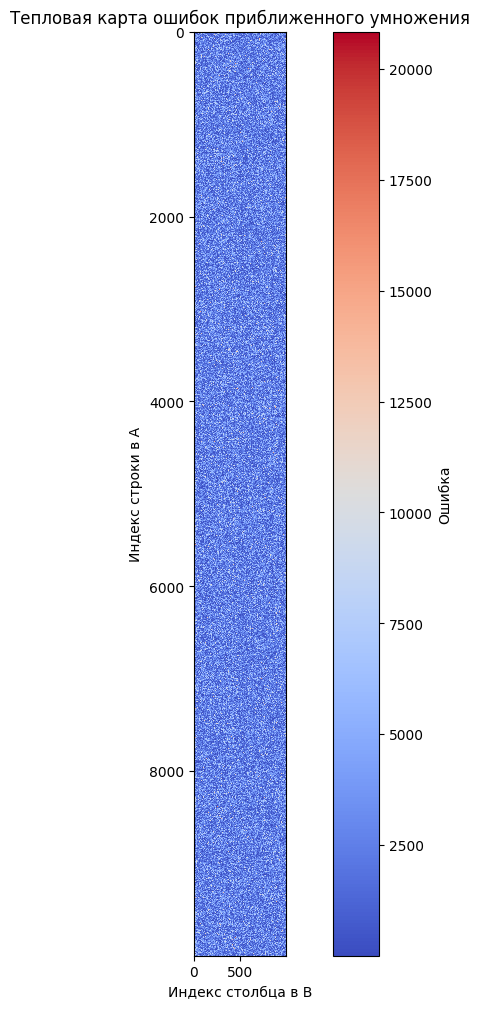

In [ ]:
errors = np.abs(A - approx_result_for_A)
plt.figure(figsize=(12, 12))
plt.imshow(errors, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Ошибка")
plt.title("Тепловая карта ошибок приближенного умножения")
plt.xlabel("Индекс столбца в B")
plt.ylabel("Индекс строки в A")
plt.show()

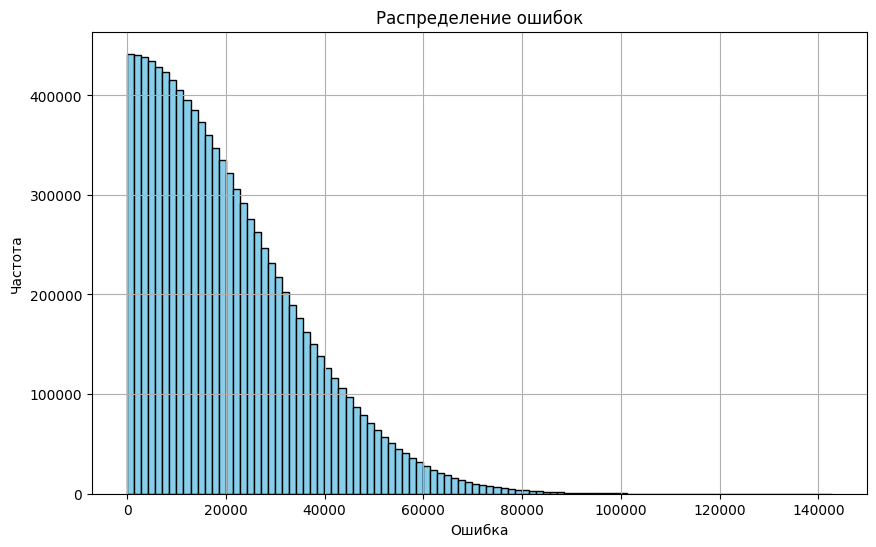

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(errors.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title("Распределение ошибок")
plt.xlabel("Ошибка")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

In [ ]:
A.shape

(10000, 1000)

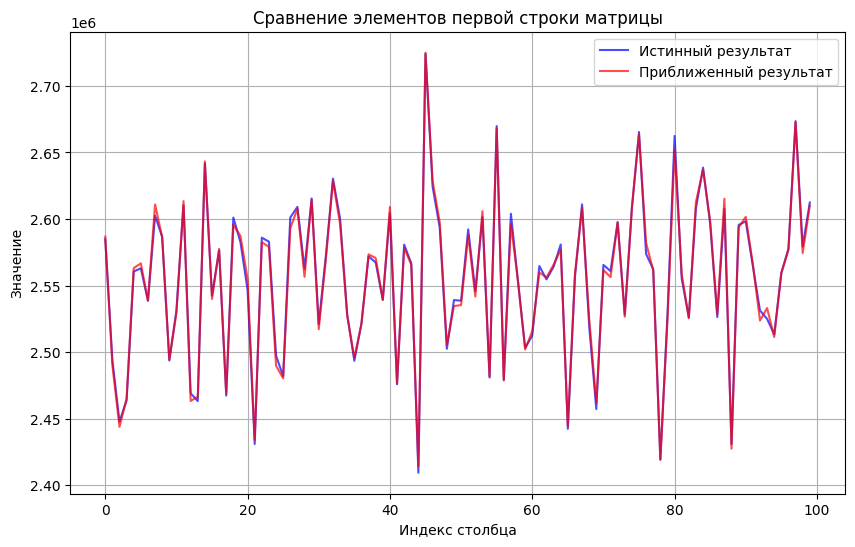

In [ ]:
# 3. Сравнение элементов приближенного и истинного результата (первый фрагмент)
plt.figure(figsize=(10, 6))
plt.plot(A[8989, :100], label="Истинный результат", color='blue', alpha=0.7)
plt.plot(approx_result_for_A[8989, :100], label="Приближенный результат", color='red', alpha=0.7)
plt.legend()
plt.title("Сравнение элементов первой строки матрицы")
plt.xlabel("Индекс столбца")
plt.ylabel("Значение")
plt.grid(True)
plt.show()

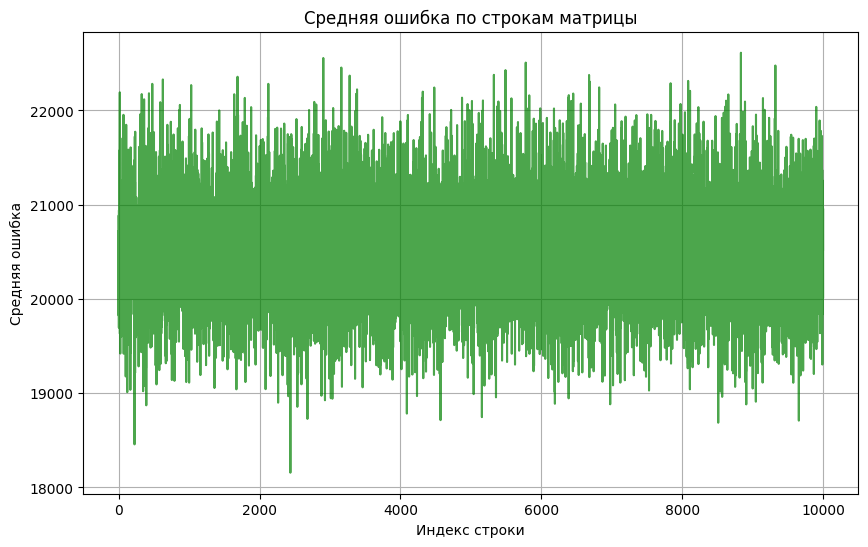

In [ ]:
# 4. Сравнение ошибок по строкам
plt.figure(figsize=(10, 6))
plt.plot(np.mean(errors, axis=1), label="Средняя ошибка по строкам", color='green', alpha=0.7)
plt.title("Средняя ошибка по строкам матрицы")
plt.xlabel("Индекс строки")
plt.ylabel("Средняя ошибка")
plt.grid(True)
plt.show()

In [ ]:
# Норма Фробениуса
frobenius_norm = np.linalg.norm(A - approx_result_for_A, 'fro')
print(f"Норма Фробениуса: {frobenius_norm}")

# Максимальная норма
max_norm = np.max(np.abs(A - approx_result_for_A))
print(f"Максимальная норма: {max_norm}")

# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(A - approx_result_for_A))
print(f"Средняя абсолютная ошибка (MAE): {mae}")

# Среднеквадратическая ошибка (MSE)
mse = np.mean((A - approx_result_for_A) ** 2)
print(f"Среднеквадратическая ошибка (MSE): {mse}")

# Косинусное сходство
cosine_similarity = np.sum(A * approx_result_for_A) / (np.linalg.norm(A) * np.linalg.norm(approx_result_for_A))
print(f"Косинусное сходство: {cosine_similarity}")

# Норма Шаттена (p=1)
u, s, vt = np.linalg.svd(A - approx_result_for_A, full_matrices=False)
schatten_norm = np.sum(s)
print(f"Норма Шаттена (p=1): {schatten_norm}")

# Корреляция между матрицами
correlation = np.corrcoef(A.flatten(), approx_result_for_A.flatten())[0, 1]
print(f"Корреляция между матрицами: {correlation}")

# Спектральная норма
spectral_norm = np.linalg.norm(A - approx_result_for_A, 2)
print(f"Спектральная норма: {spectral_norm}")

# 90-й перцентиль ошибок
percentile_90 = np.percentile(np.abs(A - approx_result_for_A), 90)
print(f"90-й перцентиль ошибок: {percentile_90}")


Норма Фробениуса: 6335100.440222815
Максимальная норма: 11194.974386386108
Средняя абсолютная ошибка (MAE): 1595.3983486343664
Среднеквадратическая ошибка (MSE): 4013349.758771125
Косинусное сходство: 0.9999996758902027
Норма Шаттена (p=1): 76968973.36885577
Корреляция между матрицами: 0.999594237320619
Спектральная норма: 781233.9611199138
90-й перцентиль ошибок: 3293.14294948643


###A*B_approximation

In [ ]:
m, k, n = 10000, 1000, 10000

r = 100

A = np.random.uniform(0, 100, size=(m, r)) @ np.random.uniform(0, 100, size=(r, k))
B = np.random.uniform(0, 100, size=(k, r)) @ np.random.uniform(0, 100, size=(r, n))

In [ ]:
%%time
true_result = np.dot(A, B)

CPU times: user 11.7 s, sys: 366 ms, total: 12.1 s
Wall time: 6.44 s


In [ ]:
%%time
U_A_full, Sigma_A_full, Vt_A_full = svd(A, full_matrices=False)

U_B_full, Sigma_B_full, Vt_B_full = svd(B, full_matrices=False)

CPU times: user 19.4 s, sys: 250 ms, total: 19.6 s
Wall time: 11.7 s


In [ ]:
print(Sigma_A_full[:20])
print(Sigma_B_full[:20])

[1.05851747e+07 3.08516670e-09 1.45269025e-09 1.05695895e-09
 1.05695895e-09 1.05695895e-09 1.05695895e-09 1.05695895e-09
 1.05695895e-09 1.05695895e-09 1.05695895e-09 1.05695895e-09
 1.05695895e-09 1.05695895e-09 1.05695895e-09 1.05695895e-09
 1.05695895e-09 1.05695895e-09 1.05695895e-09 1.05695895e-09]
[1.09055566e+07 4.65455768e-09 1.96716020e-09 1.08968401e-09
 1.08968401e-09 1.08968401e-09 1.08968401e-09 1.08968401e-09
 1.08968401e-09 1.08968401e-09 1.08968401e-09 1.08968401e-09
 1.08968401e-09 1.08968401e-09 1.08968401e-09 1.08968401e-09
 1.08968401e-09 1.08968401e-09 1.08968401e-09 1.08968401e-09]


In [ ]:
print(Sigma_A_full.shape)
print(Sigma_B_full.shape)

(1000,)
(1000,)


In [ ]:
r_A = 1000
r_B = 1000

In [ ]:
%%time
U_A_r = U_A_full[:, :r_A]
Sigma_A_r = np.diag(Sigma_A_full[:r_A])
V_A_r = Vt_A_full[:r_A, :]

U_B_r = U_B_full[:, :r_B]
Sigma_B_r = np.diag(Sigma_B_full[:r_B])
V_B_r = Vt_B_full[:r_B, :]

CPU times: user 4.39 ms, sys: 0 ns, total: 4.39 ms
Wall time: 3.06 ms


In [ ]:
%%time
approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))

CPU times: user 16.1 s, sys: 568 ms, total: 16.7 s
Wall time: 10.3 s


In [ ]:
absolute_error = np.linalg.norm(true_result - approx_result)
print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")

error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(f"Средняя ошибка приближенного умножения при взятии первых {r} сингулярных значений: {error_for_A}")

Абсолютная ошибка при взятии первых 1000, 1000 сингулярных значений: 750.0836
Средняя ошибка приближенного умножения при взятии первых 100 сингулярных значений: 1.2045988778450404e-15


In [ ]:
# Норма Фробениуса
frobenius_norm = np.linalg.norm(true_result - approx_result, 'fro')
print(f"Норма Фробениуса: {frobenius_norm}")

# Максимальная норма
max_norm = np.max(np.abs(true_result - approx_result))
print(f"Максимальная норма: {max_norm}")

# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(true_result - approx_result))
print(f"Средняя абсолютная ошибка (MAE): {mae}")

# Среднеквадратическая ошибка (MSE)
mse = np.mean((true_result - approx_result) ** 2)
print(f"Среднеквадратическая ошибка (MSE): {mse}")

# Косинусное сходство
cosine_similarity = np.sum(true_result * approx_result) / (np.linalg.norm(true_result) * np.linalg.norm(approx_result))
print(f"Косинусное сходство: {cosine_similarity}")

# Корреляция между матрицами
correlation = np.corrcoef(true_result.flatten(), approx_result.flatten())[0, 1]
print(f"Корреляция между матрицами: {correlation}")

# Спектральная норма
spectral_norm = np.linalg.norm(true_result - approx_result, 2)
print(f"Спектральная норма: {spectral_norm}")

# 90-й перцентиль ошибок
percentile_90 = np.percentile(np.abs(true_result - approx_result), 90)
print(f"90-й перцентиль ошибок: {percentile_90}")


Норма Фробениуса: 750.083619768828
Максимальная норма: 3.2109375
Средняя абсолютная ошибка (MAE): 0.05712738625
Среднеквадратическая ошибка (MSE): 0.005626254366455078
Косинусное сходство: 0.9999999999999936
Корреляция между матрицами: 1.0


###Tests

In [ ]:
A = np.array([[1, -1, 3],[3, 1, 1]])
B = np.array([[1,2,3],[4,5,6],[7,8,9]])

true_result = np.dot(A, B)

r = 1  # Значение r уменьшено до слишком малого числа для плохой аппроксимации
U_full, Sigma_full, Vt_full = svd(A, full_matrices=False)

print(U_full)
print(Sigma_full)
print(Vt_full)
print("_____________")

# Приближённое разложение для A
U_r = U_full[:, :r]  # Только первые r столбцов
Sigma_r = np.diag(Sigma_full[:r])  # Диагональная матрица с первыми r сингулярными значениями
V_r = Vt_full[:r, :]  # Только первые r строк
print("_____________")
print(U_r)
print(Sigma_r)
print(V_r)
print("_____________")
approx_result = np.dot(U_r, np.dot(Sigma_r, np.dot(V_r, B)))
error = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(approx_result)
print(true_result)
print(error)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[4.         2.44948974]
[[-7.07106781e-01  1.20868191e-16 -7.07106781e-01]
 [ 5.77350269e-01  5.77350269e-01 -5.77350269e-01]]
_____________
_____________
[[-0.70710678]
 [-0.70710678]]
[[4.]]
[[-7.07106781e-01  1.20868191e-16 -7.07106781e-01]]
_____________
[[16. 20. 24.]
 [16. 20. 24.]]
[[18 21 24]
 [14 19 24]]
0.06357701775596343


###Time Tests

In [ ]:
m, k, n = 10000, 1000, 10000

A = np.random.uniform(0, 100, size=(m, k))
B = np.random.uniform(0, 100, size=(k, n))

true_result = np.dot(A, B)

U_A_full, Sigma_A_full, Vt_A_full = svd(A, full_matrices=False)

U_B_full, Sigma_B_full, Vt_B_full = svd(B, full_matrices=False)

r_A = 900
r_B = 900

U_A_r = U_A_full[:, :r_A]
Sigma_A_r = np.diag(Sigma_A_full[:r_A])
V_A_r = Vt_A_full[:r_A, :]

U_B_r = U_B_full[:, :r_B]
Sigma_B_r = np.diag(Sigma_B_full[:r_B])
V_B_r = Vt_B_full[:r_B, :]

approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))

absolute_error = np.linalg.norm(true_result - approx_result)
print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")

error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(f"Средняя ошибка приближенного умножения при взятии первых {r_A} сингулярных значений: {error_for_A}")

Абсолютная ошибка при взятии первых 900, 900 сингулярных значений: 85733838.0697
Средняя ошибка приближенного умножения при взятии первых 900 сингулярных значений: 0.003427812581780969


In [ ]:
%%time
true_result = np.dot(A, B)

CPU times: user 11.6 s, sys: 534 ms, total: 12.1 s
Wall time: 7.28 s


In [ ]:
m, k, n = 10000, 1000, 10000

A = np.random.uniform(0, 100, size=(m, k))
B = np.random.uniform(0, 100, size=(k, n))

In [ ]:
AAA = A.tolist()
BBB = B.tolist()

In [ ]:
%%time
# Инициализируем пустую матрицу C размером m x n, заполненную нулями
C = [[0 for _ in range(n)] for _ in range(m)]

# Умножаем матрицы по правилу тройного цикла
for i in range(m):  # строки матрицы A
    for j in range(n):  # столбцы матрицы B
        for p in range(k):  # индекс для произведения элементов A и B
            C[i][j] += AAA[i][p] * BBB[p][j]

In [ ]:
%%time
U_A_full, Sigma_A_full, Vt_A_full = svd(A, full_matrices=False)

U_B_full, Sigma_B_full, Vt_B_full = svd(B, full_matrices=False)



CPU times: user 19.1 s, sys: 214 ms, total: 19.4 s
Wall time: 14.4 s


In [ ]:
r_A = 1000
r_B = 1000

In [ ]:
%%time
U_A_r = U_A_full[:, :r_A]
Sigma_A_r = np.diag(Sigma_A_full[:r_A])
V_A_r = Vt_A_full[:r_A, :]

U_B_r = U_B_full[:, :r_B]
Sigma_B_r = np.diag(Sigma_B_full[:r_B])
V_B_r = Vt_B_full[:r_B, :]

approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))

CPU times: user 16.2 s, sys: 718 ms, total: 16.9 s
Wall time: 9.18 s


In [ ]:

absolute_error = np.linalg.norm(true_result - approx_result)
print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")

error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(f"Средняя ошибка приближенного умножения при взятии первых {r_A} сингулярных значений: {error_for_A}")

Абсолютная ошибка при взятии первых 1000, 1000 сингулярных значений: 0.0001
Средняя ошибка приближенного умножения при взятии первых 1000 сингулярных значений: 3.807051650153025e-15


In [ ]:
import time
times = []
svs = [ ]
for r_A in range(1000,100,-50):
  start_time = time.time()  # Запоминаем текущее время
  r_B = r_A
  U_A_r = U_A_full[:, :r_A]
  Sigma_A_r = np.diag(Sigma_A_full[:r_A])
  V_A_r = Vt_A_full[:r_A, :]

  U_B_r = U_B_full[:, :r_B]
  Sigma_B_r = np.diag(Sigma_B_full[:r_B])
  V_B_r = Vt_B_full[:r_B, :]

  approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))
  end_time = time.time()  # Запоминаем текущее время после выполнения
  execution_time = end_time - start_time  # Считаем разницу во времени
  times.append(execution_time)
  svs.append(r_A)
  absolute_error = np.linalg.norm(true_result - approx_result)
  error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
  print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")
  print(f"Средняя ошибка приближенного умножения при взятии первых {r_A} сингулярных значений: {error_for_A}")
  print(f"Время выполнения при {r_A} сингулярных значений: {execution_time:.4f} секунд")
  print("______________________________________________________")

Абсолютная ошибка при взятии первых 1000, 1000 сингулярных значений: 0.0001
Средняя ошибка приближенного умножения при взятии первых 1000 сингулярных значений: 4.06457219045546e-15
Время выполнения при 1000 сингулярных значений: 10.4195 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 950, 950 сингулярных значений: 59261308.5216
Средняя ошибка приближенного умножения при взятии первых 950 сингулярных значений: 0.0023704981135801934
Время выполнения при 950 сингулярных значений: 9.8571 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 900, 900 сингулярных значений: 85523992.2560
Средняя ошибка приближенного умножения при взятии первых 900 сингулярных значений: 0.0034210257479311127
Время выполнения при 900 сингулярных значений: 8.9638 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 850, 850 сингулярных значений: 106533456.0372
Средняя ошибка 

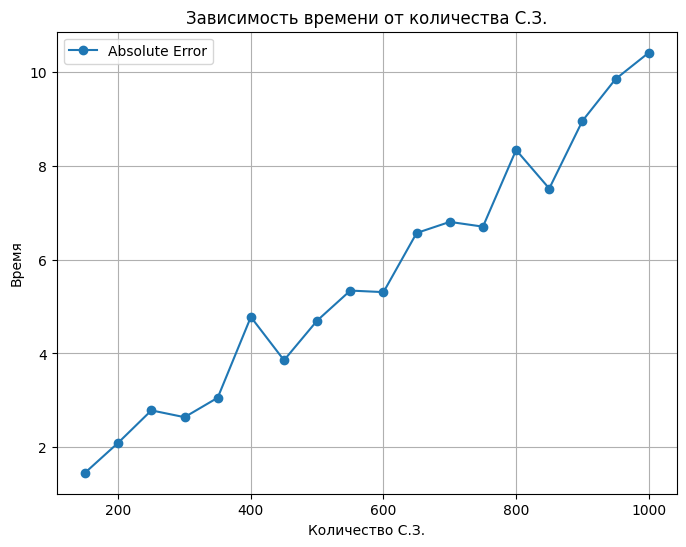

In [ ]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(svs, times, label="Absolute Error", marker='o')
plt.xlabel("Количество С.З.")
plt.ylabel("Время")
plt.title("Зависимость времени от количества С.З.")
plt.legend()
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [ ]:
m, k, n = 10000, 1000, 10000

r = 950 # искусственно делаем ранг r

A = np.random.uniform(0, 100, size=(m, r)) @ np.random.uniform(0, 100, size=(r, k))
B = np.random.uniform(0, 100, size=(k, r)) @ np.random.uniform(0, 100, size=(r, n))

true_result = np.dot(A, B)

U_A_full, Sigma_A_full, Vt_A_full = svd(A, full_matrices=False)

U_B_full, Sigma_B_full, Vt_B_full = svd(B, full_matrices=False)

for r_A in range(1000,800,-10):
  start_time = time.time()  # Запоминаем текущее время
  r_B = r_A
  U_A_r = U_A_full[:, :r_A]
  Sigma_A_r = np.diag(Sigma_A_full[:r_A])
  V_A_r = Vt_A_full[:r_A, :]

  U_B_r = U_B_full[:, :r_B]
  Sigma_B_r = np.diag(Sigma_B_full[:r_B])
  V_B_r = Vt_B_full[:r_B, :]

  approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))
  end_time = time.time()  # Запоминаем текущее время после выполнения
  execution_time = end_time - start_time  # Считаем разницу во времени

  absolute_error = np.linalg.norm(true_result - approx_result)
  error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
  print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")
  print(f"Средняя ошибка приближенного умножения при взятии первых {r_A} сингулярных значений: {error_for_A}")
  print(f"Время выполнения при {r_A} сингулярных значений: {execution_time:.4f} секунд")
  print("______________________________________________________")

Абсолютная ошибка при взятии первых 1000, 1000 сингулярных значений: 109739.0892
Средняя ошибка приближенного умножения при взятии первых 1000 сингулярных значений: 1.94766131495018e-15
Время выполнения при 1000 сингулярных значений: 10.5327 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 990, 990 сингулярных значений: 109762.7644
Средняя ошибка приближенного умножения при взятии первых 990 сингулярных значений: 1.9480815053614766e-15
Время выполнения при 990 сингулярных значений: 9.7022 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 980, 980 сингулярных значений: 109848.9500
Средняя ошибка приближенного умножения при взятии первых 980 сингулярных значений: 1.9496111367535663e-15
Время выполнения при 980 сингулярных значений: 8.6826 секунд
______________________________________________________
Абсолютная ошибка при взятии первых 970, 970 сингулярных значений: 109882.0147
Средняя ошибка 

KeyboardInterrupt: 

In [ ]:

m, n, r = 100, 100, 5  # m x n матрица ранга r
A = np.random.randn(m, r)  # Случайная матрица (m x r)
B = np.random.randn(r, n)  # Случайная матрица (r x n)

low_rank_matrix = A @ B  # Матрица (m x n) с рангом r

print(f"Размер матрицы: {low_rank_matrix.shape}")
print(f"Ранг матрицы: {np.linalg.matrix_rank(low_rank_matrix)}")


m, k, n = 10000, 1000, 10000

r = 100

A = np.random.uniform(0, 100, size=(m, r)) @ np.random.uniform(0, 100, size=(r, k))
B = np.random.uniform(0, 100, size=(k, r)) @ np.random.uniform(0, 100, size=(r, n))

print(f"Размер матрицы: {A.shape}")
print(f"Ранг матрицы: {np.linalg.matrix_rank(A)}")
print(f"Размер матрицы: {B.shape}")
print(f"Ранг матрицы: {np.linalg.matrix_rank(B)}")


Размер матрицы: (100, 100)
Ранг матрицы: 5
Размер матрицы: (10000, 1000)
Ранг матрицы: 100
Размер матрицы: (1000, 10000)
Ранг матрицы: 100
